# Bootstrapping

Lucas De Oliveira, Kooha Kwon, Melvin Vellera

In [18]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from scipy.stats import t
import random


## Quick Recap

Bootstrapping is a technique of **iterative resampling with replacement** to make inferences about the general population without conducting more experiments.

Say we ran an experiments with the following experimental results:

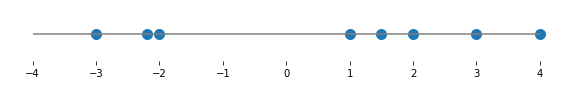

In [3]:
# Experimental sample
exp_sample = [-3, -2.2, -2, 1, 1.5, 2, 3, 4]

# Plot
fig, ax = plt.subplots(figsize = (10, 1))
ax.hlines(y = 0.0, xmax = 4.0, xmin = -4.0, color = 'grey')
ax.scatter(exp_sample, [0]*len(exp_sample), s = 100)

ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

Let's see what bootstrapped samples look like (re-run code cell to see variability of samples)...

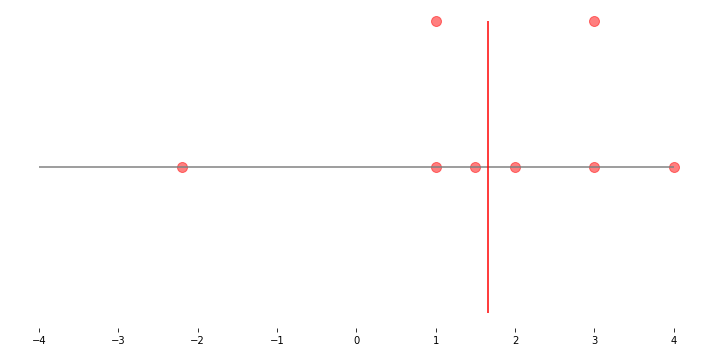

In [4]:
# Get two bootstrapped samples
inds = np.random.randint(0,8,8)
strap = [exp_sample[j] for j in inds]
val_count = Counter(strap)

bootstrap = []
counts = []
for val, count in val_count.items():
    k = 1
    while k <= count:
        bootstrap.append(val)
        counts.append(k)
        k += 1       


# Plot
fig, ax = plt.subplots(figsize = (10, 5))

ax.hlines(y = 1.0, xmax = 4.0, xmin = -4.0, color = 'grey')
ax.scatter(bootstrap, counts, s = 100, color = 'red', alpha = .5)

ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.vlines(x = np.mean(bootstrap), ymin = 0.0, ymax = 2.0, color = 'red')

plt.tight_layout()
plt.show()

Finally, we can analyze the summary statistic(s) for our bootstrapped samples:

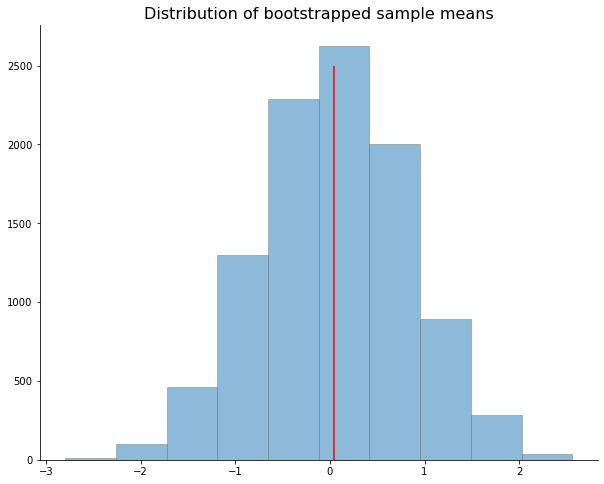

In [5]:
# Bootstrap 10,000 samples
means = []

for i in range(10_000):
    inds = np.random.randint(0,7,8)
    strap = [exp_sample[j] for j in inds]
    means.append(np.mean(strap))

# Plot
fig, ax = plt.subplots(figsize = (10,8))

ax.hist(means, alpha = .5, edgecolor = 'grey')
ax.vlines(x = np.mean(means), ymin = 0, ymax = 2500, color = 'red')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Distribution of bootstrapped sample means', size = 16)

plt.show()

## Example with Real Data

**Description of example/data here** -- for now I have included BodyFatPercentage.csv

1. Take sample size 10 from one of the columns (we'll call the population)
2. Use traditional t-dist for confidence interval (too wide)
3. Bootstrap sample size 10 10,000x
4. Compare to population

In [106]:
# Load data
bfp = pd.read_csv('BodyFatPercentage.csv')
bfp.head()

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,1,12.6,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### Using sklearn

Instead of bootstrapping manually, we can use scikit-learn's resample() function...

In [107]:
from sklearn.utils import resample
a = [1, 2, 3, 4, 5, 6, 8, 9, 10]
b = resample(a, replace = True, n_samples = len(a), random_state = 1)
b

[6, 10, 6, 1, 1, 2, 9, 8, 3]

### Look at distribution of sample (population)

**We can consider using an entire column to represent the population and select a random sample from the column to play with. Then we can compare to "population" to see how distributions differ.**

### Bootstrap and calculate statistic

###

In [126]:
bf_mean = bfp['BODYFAT'].mean()
pop_n = len(bfp)
print(pop_n)

252


In [127]:
print(f'''Average Body Fat: {bf_mean:.2f}\nNumber of Observations: {pop_n}''')

Average Body Fat: 18.94
Number of Observations: 252


In [128]:
# Lets say that we only have N = 15:

sample_bfp = bfp.loc[random.sample(range(252), 15)]
sample_bfp

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
67,68,14.0,1.0673,55,154.75,71.50,36.9,95.4,86.6,91.8,54.3,35.4,21.5,32.8,27.4,18.7
109,110,21.0,1.0500,40,168.50,69.25,34.2,97.8,92.3,100.6,57.5,36.8,22.8,32.1,26.0,17.3
56,57,20.1,1.0524,58,181.50,68.00,39.1,100.0,99.8,102.5,62.1,39.6,22.5,33.1,28.3,18.5
206,207,31.7,1.0250,44,166.00,65.50,39.1,100.6,93.9,100.1,58.9,37.6,21.4,33.1,29.5,17.3
26,27,8.5,1.0811,34,131.50,67.50,36.2,88.6,74.6,85.3,51.7,34.7,21.4,28.7,27.0,16.5
170,171,4.1,1.0926,35,152.25,67.75,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7
108,109,17.2,1.0593,43,194.00,75.50,38.5,110.1,88.7,102.1,57.5,40.0,24.8,35.1,30.7,19.2
25,26,4.6,1.0911,27,159.25,71.50,35.7,89.6,79.7,96.5,55.0,36.7,22.5,29.9,28.2,17.7
114,115,25.9,1.0384,48,175.25,71.75,38.0,100.7,92.4,97.5,59.3,38.1,21.8,31.8,27.3,17.5
245,246,15.3,1.0641,68,155.50,69.25,36.3,97.4,84.3,94.4,54.3,37.5,22.6,29.2,27.3,18.5


In [129]:
s = np.std(bfp['BODYFAT'], ddof = 1)
stat_ci = [bf_mean - t.ppf(1 - 0.05/2, n-1)* (s / np.sqrt(n)), bf_mean + t.ppf(1 - 0.05/2, n-1)* (s / np.sqrt(n))]
print(f'''Statistical Confidence Interval: {[f'{e:.2f}' for e in stat_ci]}''')

Statistical Confidence Interval: ['15.31', '22.57']


In [130]:
means = []
for i in range(1000000):
    inds = np.random.randint(0,14, 14)
    mean = sample_bfp['BODYFAT'].iloc[inds].mean()
    means.append(mean)

In [131]:
boot_mean = np.mean(means)
boot_ci = [np.quantile(means, 0.025), np.quantile(means, 0.975)]

In [132]:
print(f'''Statistical Confidence Interval: {[f'{e:.2f}' for e in stat_ci]}''')
print(f'''Bootstrap Confidence Interval: {[f'{e:.2f}' for e in boot_ci]}''')

Statistical Confidence Interval: ['15.31', '22.57']
Bootstrap Confidence Interval: ['11.37', '21.46']


(array([ 2.,  1.,  9., 14., 21., 22., 21., 25., 27., 29., 22., 20., 16.,
        12.,  7.,  1.,  2.,  0.,  0.,  1.]),
 array([ 0.   ,  2.255,  4.51 ,  6.765,  9.02 , 11.275, 13.53 , 15.785,
        18.04 , 20.295, 22.55 , 24.805, 27.06 , 29.315, 31.57 , 33.825,
        36.08 , 38.335, 40.59 , 42.845, 45.1  ]),
 <BarContainer object of 20 artists>)

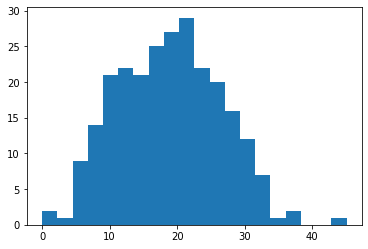

In [133]:
plt.hist(bfp['BODYFAT'],bins=20)